## Week 2 Data Assignment

### Importing and organizing a dataset for the final project

For this project, I hope to look at some of the trends that emerged through community engagement work in Silverton, Colorado to see how these themes are also emerging in communities across the state. Eventually, I want to learn if the geographic isolation and lack of economic diversity of former mining towns differ from the more economically diverse urban areas and the communities that surround them. 

One important part of my analysis will be using recent census data to understand demographic shifts across the state, especially in terms of growth and where it is occuring and how the economies of different locations across the state might vary. 

Using recent census data will be critical to my analysis, especially considering growth/population influx as a result of remote work and Covid-19.

Here, I'll do some basic work to clean up a 2020 Census data set by county for the State of Colorado.  


### Data Exploration

In [1]:
import geopandas as gpd

I start by importing the geopandas module so that I can plot my spatial data from the census on a map if I need to. I then bring in my zipped shapefile of 2020 Census data that I got from the [Colorado State Demographer's Website](https://demography.dola.colorado.gov/data/). 

In [3]:
zipfile = "Census_County_Data_2020.zip"
Census = gpd.read_file(zipfile)

With my data imported to my notebook, I can now find out a bit more about the number of rows and columns associated with my dataframe with the **.shape** command.

In [4]:
Census.shape

(64, 54)

* This output tells me that I have 64 rows and 54 columns in this dataset.

In [5]:
type(Census)

geopandas.geodataframe.GeoDataFrame

the **type()** command confirms for me that the Census data is a geospatial dataframe.

I want to find out more information about my data frame, so I will use **.info.**

In [7]:
Census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COUNTYFP20  64 non-null     object  
 1   COUNTYNS20  64 non-null     object  
 2   GEOID20     64 non-null     object  
 3   NAME20      64 non-null     object  
 4   NAMELSAD20  64 non-null     object  
 5   GEOTXT      64 non-null     object  
 6   TOTALPOP    64 non-null     int64   
 7   WHITEALONE  64 non-null     int64   
 8   BLACKALONE  64 non-null     int64   
 9   AMERIALONE  64 non-null     int64   
 10  ASIANALONE  64 non-null     int64   
 11  PIALONE     64 non-null     int64   
 12  OTHERALONE  64 non-null     int64   
 13  MULTIALONE  64 non-null     int64   
 14  HISPANIC    64 non-null     int64   
 15  NOTHISP     64 non-null     int64   
 16  NHWHITE     64 non-null     int64   
 17  NHBLACK     64 non-null     int64   
 18  NHAMERI     64 non-null     int64   
 19  NH

This gives me information about the columns of my dataset, the number of non-null components, and the datatype for the columns of my data.


To see a bit more of what my data frame has to offer, I'll use **.head** to see the first 5 rows that I have.

In [8]:
Census.head()

,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,GEOTXT,TOTALPOP,WHITEALONE,BLACKALONE,AMERIALONE,...,INSTITPOP,CORRPOP,JUVPOP,NURSINGPOP,OINSTITPOP,NONINSTPOP,COLLEGEPOP,MILITPOP,ONINSTITPO,geometry
0,091,00198161,08091,Ouray,Ouray County,G08091,4874,4396,16,16,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-108.13238 38.33157, -108.12994 38.3..."
1,011,00198121,08011,Bent,Bent County,G08011,5650,3831,256,162,...,1454,1395,0,59,0,88,0,0,88,"POLYGON ((-103.16301 38.26597, -103.14005 38.2..."
2,007,00198119,08007,Archuleta,Archuleta County,G08007,13359,10749,41,240,...,64,15,0,49,0,25,0,0,25,"POLYGON ((-107.25497 37.00002, -107.25530 37.0..."
3,107,00198169,08107,Routt,Routt County,G08107,24829,21726,156,116,...,139,25,0,114,0,223,167,0,56,"POLYGON ((-107.08867 40.22579, -107.09609 40.2..."
4,053,00198142,08053,Hinsdale,Hinsdale County,G08053,788,706,8,6,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-107.59137 37.99225, -107.59077 37.9..."


Similarly, **.tail** shows me the last 5 rows of my dataframe.

In [13]:
Census.tail()

,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,GEOTXT,TOTALPOP,WHITEALONE,BLACKALONE,AMERIALONE,...,INSTITPOP,CORRPOP,JUVPOP,NURSINGPOP,OINSTITPOP,NONINSTPOP,COLLEGEPOP,MILITPOP,ONINSTITPO,geometry
59,083,00198157,08083,Montezuma,Montezuma County,G08083,25849,18958,80,3342,...,224,121,0,103,0,65,0,0,65,"POLYGON ((-108.69476 37.63152, -108.69467 37.6..."
60,001,00198116,08001,Adams,Adams County,G08001,519572,289718,17463,9520,...,3125,1485,86,1547,7,1339,0,0,1339,"POLYGON ((-104.60727 39.89912, -104.60773 39.8..."
61,079,00198155,08079,Mineral,Mineral County,G08079,865,789,3,6,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-107.14473 37.68250, -107.14473 37.6..."
62,089,00198160,08089,Otero,Otero County,G08089,18690,12847,165,376,...,173,8,0,165,0,250,211,0,39,"POLYGON ((-103.67373 38.11291, -103.66469 38.1..."
63,095,00198163,08095,Phillips,Phillips County,G08095,4530,3500,19,52,...,71,0,0,71,0,0,0,0,0,"POLYGON ((-102.38226 40.74935, -102.38176 40.7..."


Now, I'll plot my spatial data to see what I have!

<AxesSubplot:>

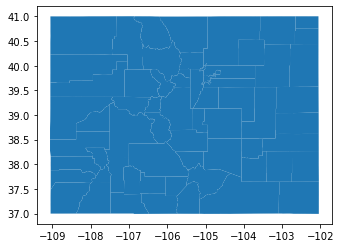

In [9]:
Census.plot()

This gives me a plot of the polygons that make up the counties in Colorado according to their geographic data that is stored in the census.

### Organizing my Data 

It's helpful to see the columns for the entire Census data listed out so that I can choose the data of interest to me. I can list out all of the columns in my dataframe by using **.columns.to_list()**

In [39]:
Census.columns.to_list() 

['COUNTYFP20',
 'COUNTYNS20',
 'GEOID20',
 'NAME20',
 'NAMELSAD20',
 'GEOTXT',
 'TOTALPOP',
 'WHITEALONE',
 'BLACKALONE',
 'AMERIALONE',
 'ASIANALONE',
 'PIALONE',
 'OTHERALONE',
 'MULTIALONE',
 'HISPANIC',
 'NOTHISP',
 'NHWHITE',
 'NHBLACK',
 'NHAMERI',
 'NHASIAN',
 'NHPI',
 'NHOTHER',
 'NHMULTI',
 'POP18',
 'WHITE18',
 'BLACK18',
 'AMERI18',
 'ASIAN18',
 'PI18',
 'OTHER18',
 'MULTI18',
 'HISP18',
 'NOTHISP18',
 'NHWHITE18',
 'NHBLACK18',
 'NHAMERI18',
 'NHASIAN18',
 'NHPI18',
 'NHOTHER18',
 'NHMULTI18',
 'HOUSEUNIT',
 'OCCUPIED',
 'VACANT',
 'GQPOP',
 'INSTITPOP',
 'CORRPOP',
 'JUVPOP',
 'NURSINGPOP',
 'OINSTITPOP',
 'NONINSTPOP',
 'COLLEGEPOP',
 'MILITPOP',
 'ONINSTITPO',
 'geometry']

One thing I know I'll want to look is the population count of each county. Later I will analyze which counties have seen the most growth when I download and work with the 2010 census data. I am also interested in the housing statistics ('OCCUPIED' and 'VACANT'), as well as the racial demographics, especially the growth or loss of Latinx populations.

I'll use the **.value_counts** command to get a sense of what these amounts look like.

In [40]:
Census['TOTALPOP'].value_counts()

4874      1
5650      1
705       1
17358     1
17390     1
         ..
655070    1
14555     1
15717     1
6368      1
4530      1
Name: TOTALPOP, Length: 64, dtype: int64

This shows me the total populations of the counties in Colorado, and confirms for me that the population count variables are integers that I can use to plot/do computations.

### Trimming the Data

I don't need all of the data from the Census, so I'll now trim the dataframe based on some of the characteristics I may want to analyze. I can do this using **desired_columns**

In [25]:
desired_columns = ['NAME20', 'TOTALPOP', 'HISPANIC', 'HOUSEUNIT', 'OCCUPIED', 'VACANT']
Census[desired_columns]

,NAME20,TOTALPOP,HISPANIC,HOUSEUNIT,OCCUPIED,VACANT
0,Ouray,4874,292,3314,2297,1017
1,Bent,5650,1760,2136,1805,331
2,Archuleta,13359,2159,9495,5792,3703
3,Routt,24829,2200,16511,10388,6123
4,Hinsdale,788,30,1329,375,954
...,...,...,...,...,...,...
59,Montezuma,25849,3109,12295,10806,1489
60,Adams,519572,216649,186544,178525,8019
61,Mineral,865,47,1215,424,791
62,Otero,18690,7702,8716,7676,1040


I now just have the columns I will likely need for my analysis. I'll want to save this trimmed version of the data.

In [38]:
Census_trimmed = Census[desired_columns].copy()
Census_trimmed

,NAME20,TOTALPOP,HISPANIC,HOUSEUNIT,OCCUPIED,VACANT
0,Ouray,4874,292,3314,2297,1017
1,Bent,5650,1760,2136,1805,331
2,Archuleta,13359,2159,9495,5792,3703
3,Routt,24829,2200,16511,10388,6123
4,Hinsdale,788,30,1329,375,954
...,...,...,...,...,...,...
59,Montezuma,25849,3109,12295,10806,1489
60,Adams,519572,216649,186544,178525,8019
61,Mineral,865,47,1215,424,791
62,Otero,18690,7702,8716,7676,1040


I saved my trimmed data set as a new data frame by creating a copy that only includes the columns I selected before.

In [35]:
Census_trimmed.columns = ['County Name', 'Total Population', 'Hispanic Pop.', 'Housing Units', 'Occupied Units', 'Vacant Units']
Census_trimmed

,County Name,Total Population,Hispanic Pop.,Housing Units,Occupied Units,Vacant Units
0,Ouray,4874,292,3314,2297,1017
1,Bent,5650,1760,2136,1805,331
2,Archuleta,13359,2159,9495,5792,3703
3,Routt,24829,2200,16511,10388,6123
4,Hinsdale,788,30,1329,375,954
...,...,...,...,...,...,...
59,Montezuma,25849,3109,12295,10806,1489
60,Adams,519572,216649,186544,178525,8019
61,Mineral,865,47,1215,424,791
62,Otero,18690,7702,8716,7676,1040


Here, I renamed the columns with clearer and more descriptive information so that I have a better sense of what the data that I am working with means.

### Graphing Census Data

Finally, I'll finish off for now by creating a graph of how the total population compares to the Hispanic population across the state based on the 2020 Census.

<AxesSubplot:title={'center':'Colorado Population by County'}, xlabel='County Name'>

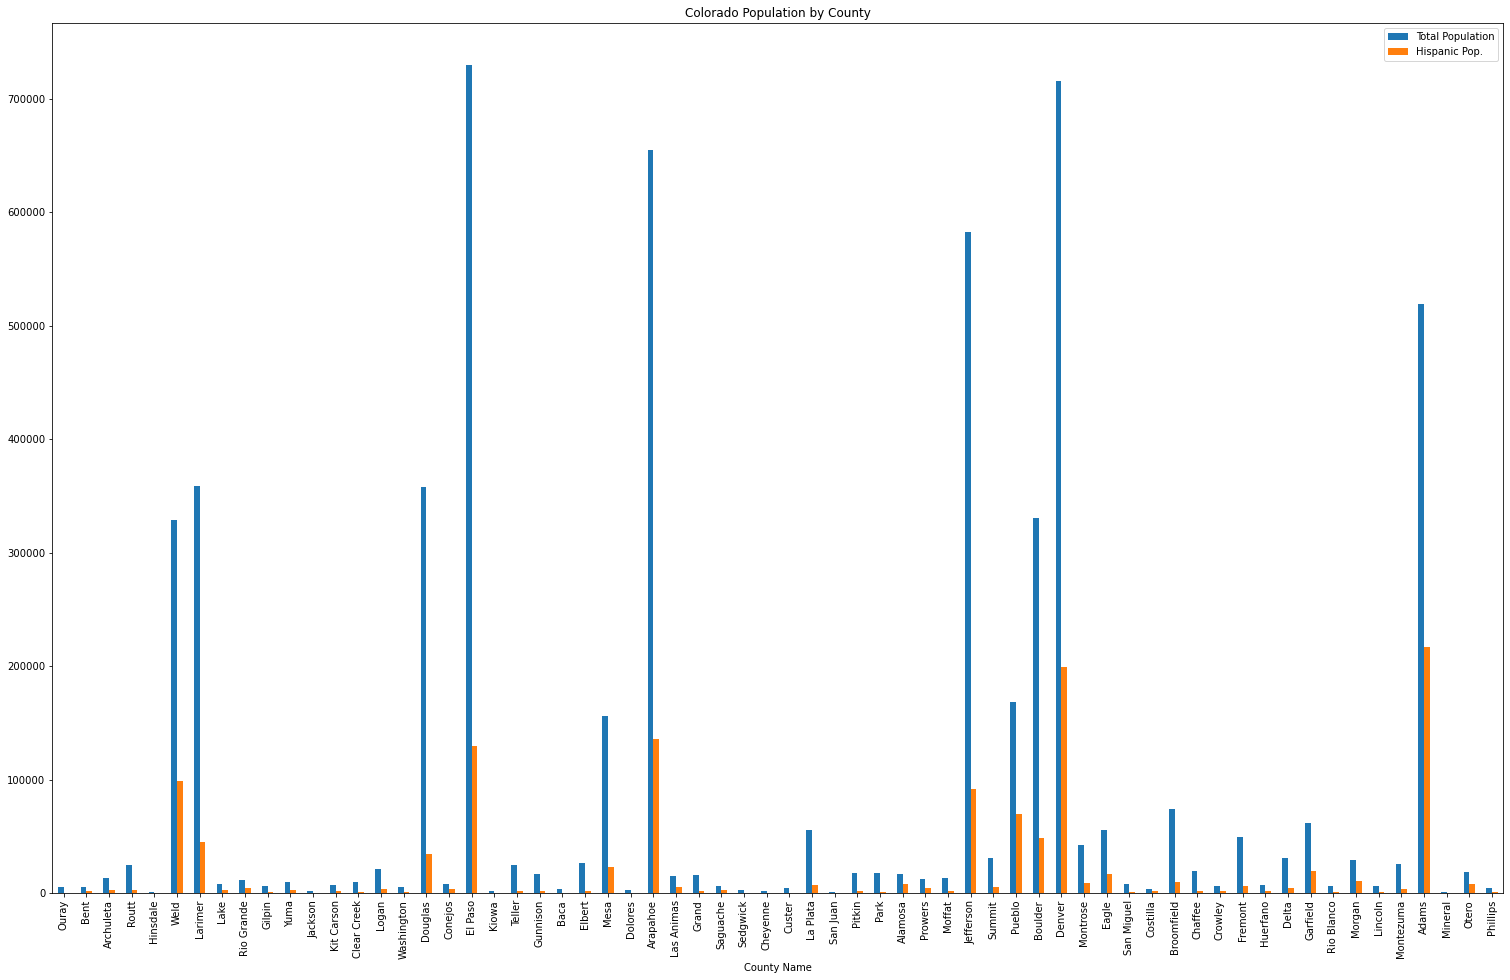

In [36]:
Census_trimmed.plot.bar(
    figsize=(26,16), x = 'County Name', y = ['Total Population', 'Hispanic Pop.'], title = 'Colorado Population by County')

Since I am interested in the popluation count and the hispanic population for each county, I used the **plot.bar** command to to create a bar chart that shows both of these variables for each county, with clearly and correctly labeled axes based on my trimmed data frame and renamed columns.